(Notes:
As a passenger, you’ll be kept away from any fights, but the Gray Swan has no lifeboats; keeping the ship from sinking is necessary and sufficient to ensure your survival.
Ships are fully repaired every time they make port.
Interventions stack such that two 10% reductions are equivalent to one 20% reduction.
Interventions apply such that a 10% reduction to an attack that would do 80% damage does 72% damage instead.
Each journey takes a month; it is currently Month 5, Year 1406.)

|                                                                                                                               Intervention                                                                                                                               |     Cost    |   |   |   |
|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:-----------:|---|---|---|
| Coating the underside of the ship in shark repellent would ensure that no journey would feature shark attacks; however, Vaarsuvius’ Law (“every trip between plot-relevant locations will have exactly one random encounter”) means something else would attack instead. |     40gp    |   |   |   |
|             You’ve given up trying to understand what it is about woodwork that makes its practitioners so good at fighting Crabmonsters, but your findings are undeniable: arming the ship’s carpenters would halve the damage done by Crabmonster attacks.             |     20gp    |   |   |   |
|                                                                           Offering tribute to the Merpeople would ensure they won’t attack the ship, similar to the effect of shark repellent.                                                                           |     45gp    |   |   |   |
|                 There’s enough space in the lower decks to add up to twenty more oars, so when fleeing is the best option, the entire crew can work together to escape. Each extra oar would decrease the damage done by Krakens and Demon Whales by 2%.                 |   1gp/oar   |   |   |   |
|                     You wouldn’t think these ships could fit more artillery, but clever ergonomics allow you to add up to three more cannons. Your studies suggest each cannon would reduce the damage suffered in Nessie and Pirate attacks by 10%.                     | 10gp/cannon |   |   |   |
|                                                                   Arming the Crow’s Nest with state-of-the-art rifles would give lookouts a 70% chance of ensuring a given Harpy attack does no damage.                                                                  |     35gp    |   |   |   |
|                                Giving the deck crew novelty foam swords to wield alongside their standard-issue cutlasses would improve their effectiveness when fighting Water Elementals, reducing the damage these creatures do by 60%.                               |     15gp    |   |   |   |

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib 
data = pd.read_csv('./dset.csv')
data['damage'] = data['damage taken'].str.rstrip('%+').astype('float') / 100.0
data[['month', 'year']] = data['month of departure'].str.split('/', n=1, expand=True)
data
import seaborn as sns

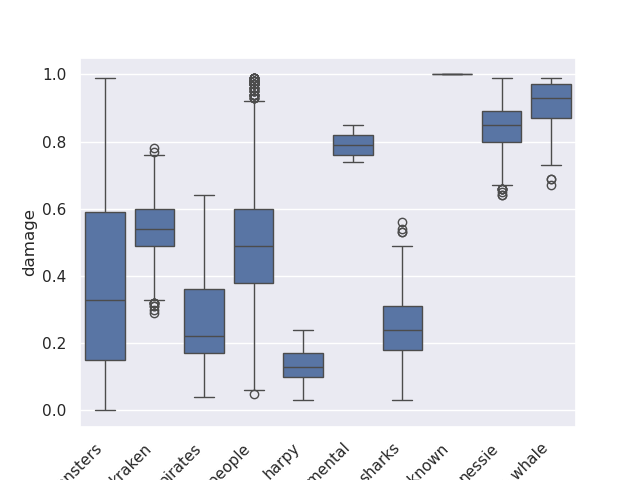

In [14]:
#data.groupby('encounter').boxplot()
%matplotlib widget
fig1, ax1 = plt.subplots()

sns.boxplot(data=data, x=data.encounter, y=data.damage, ax=ax1)
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: xlabel='year,month'>

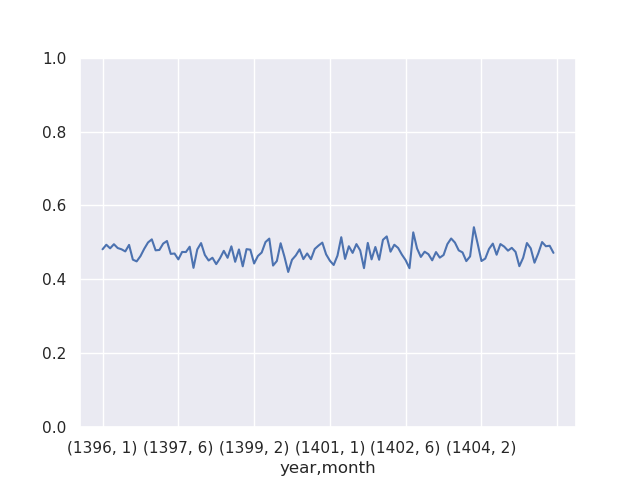

In [15]:
fig1, ax1 = plt.subplots()

data.groupby(['year','month'])['damage'].mean().plot(ylim = (0,1),ax=ax1)

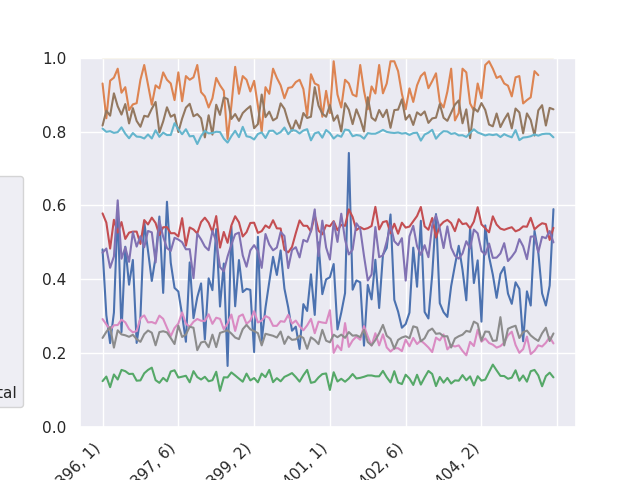

In [16]:
fig1, ax1 = plt.subplots()
data.groupby(['encounter','year','month'])['damage'].mean().groupby('encounter').plot(ylim = (0,1), legend=True)
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(-0.1, .7))
plt.show()

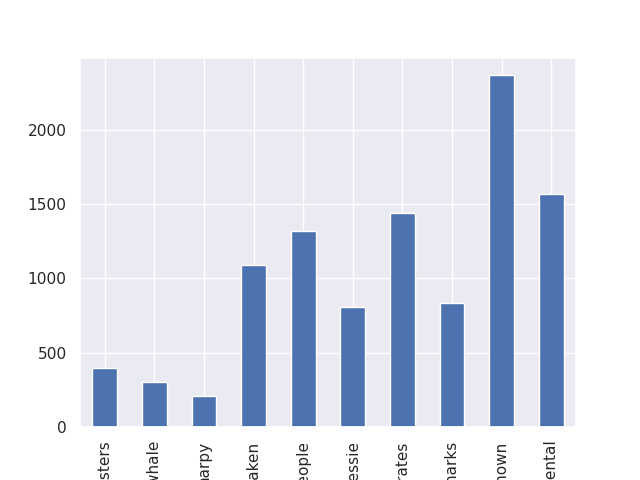

In [17]:
fig1, ax1 = plt.subplots()

data.groupby('encounter').damage.sum().plot.bar()
plt.show()

<Axes: xlabel='encounter'>

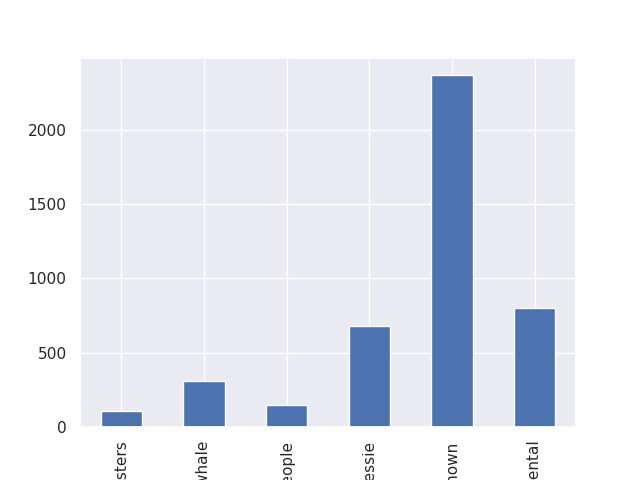

In [18]:
fig1, ax1 = plt.subplots()

data.query('damage > 0.8').groupby('encounter').damage.count().plot.bar()

/usr/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


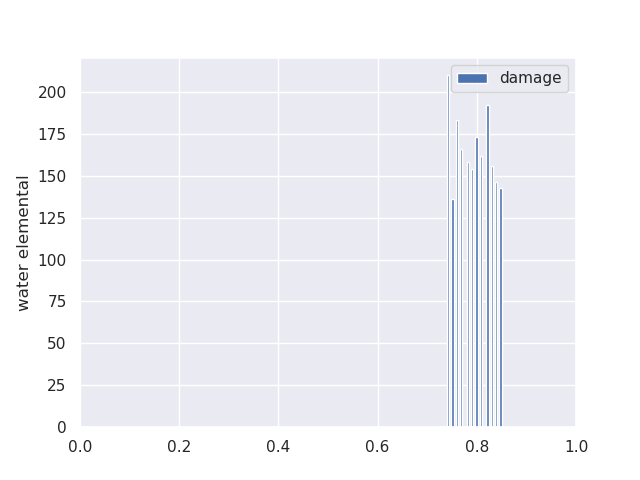

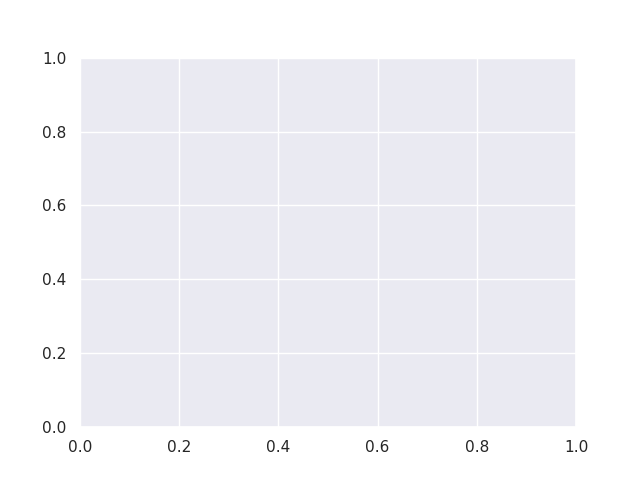

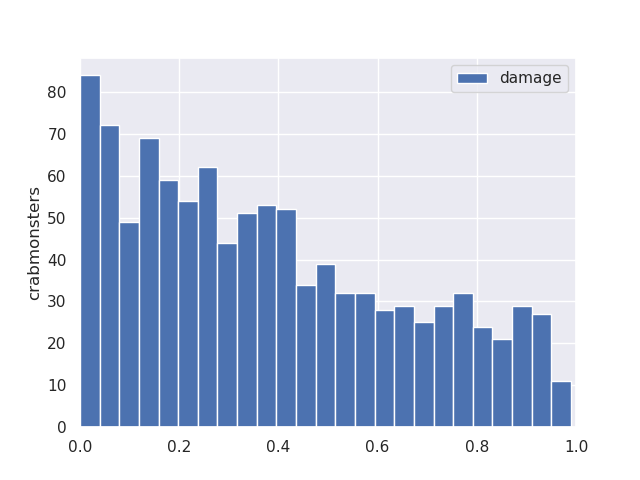

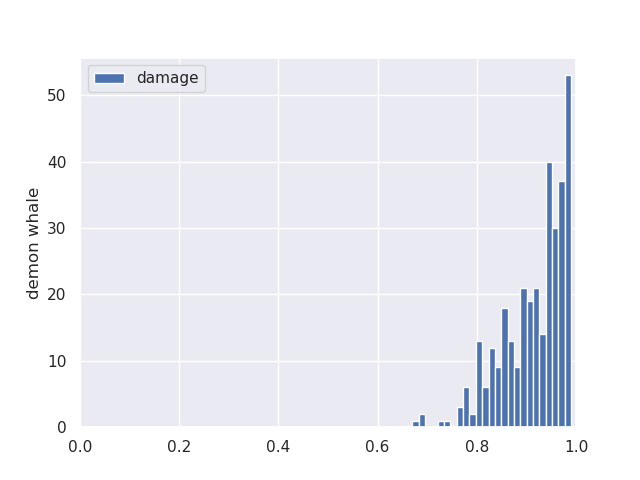

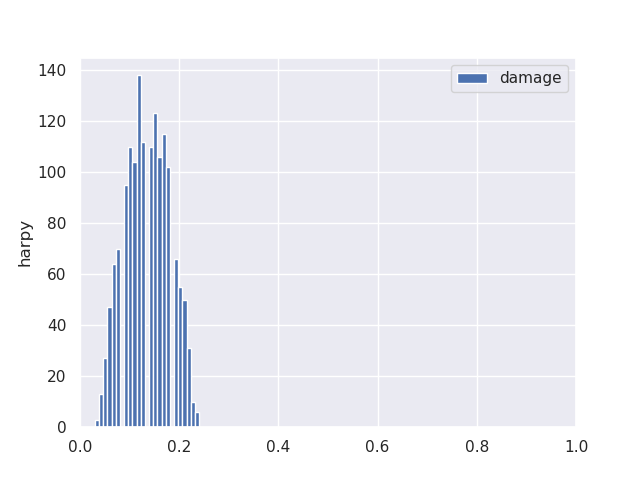

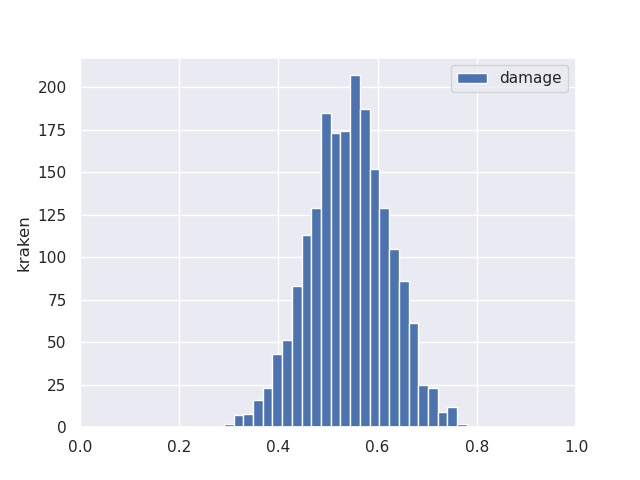

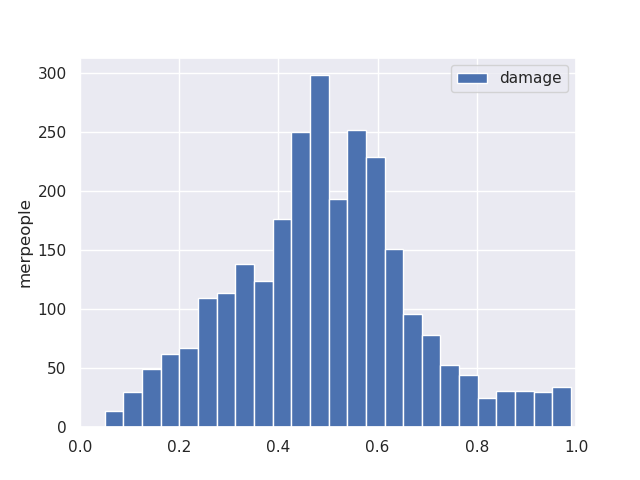

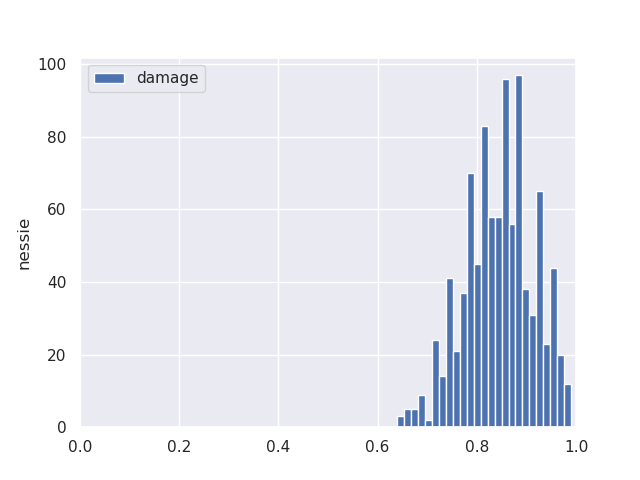

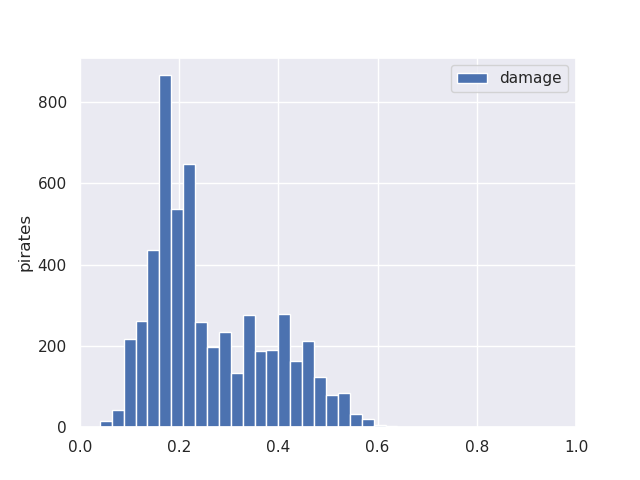

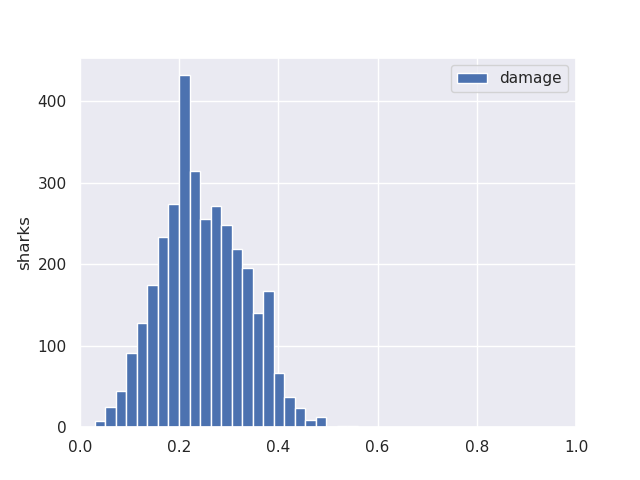

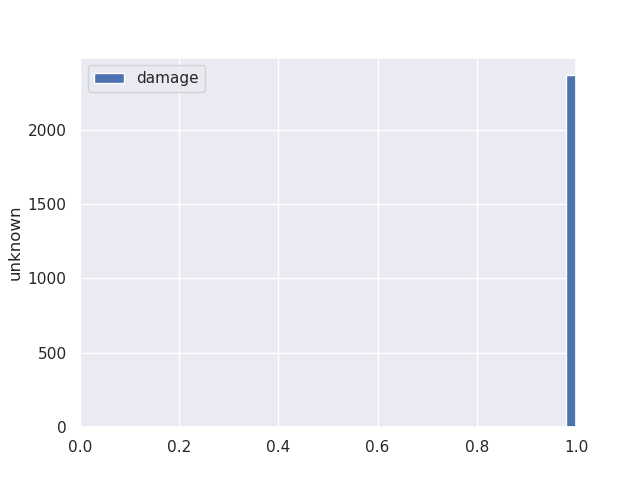

In [20]:
fig1, ax1 = plt.subplots()

for name, group in data.groupby('encounter'):
    group.plot.hist(xlim=(0,1),bins=25,ylabel=name)
plt.show()